In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
from datetime import datetime
from pandas import Series, DataFrame
from scipy import stats
from patsy import dmatrices
from sklearn import datasets, svm
import statsmodels.graphics.api as smg
import matplotlib 
%matplotlib inline
matplotlib.style.use('bmh')

### 1. Â≠¶‰π†ÁêÜËß£Â¶Ç‰ΩïÁî®ÊúÄÂ∞è‰∫å‰πòÊ≥ïÁöÑÁü©ÈòµÂÖ¨ÂºèÊù•ÂæóÂà∞Á∫øÊÄßÂõûÂΩíÁöÑËß£ÔºåÂπ∂‰ΩøÁî® numpy Â∫ìÊù•ÂÆûÁé∞ËØ•ÁÆóÊ≥ï

#### (1) ÊúÄÂ∞è‰∫å‰πòÊ≥ïÁöÑÁü©ÈòµÂÖ¨Âºè

- ÂÖà‰ªéÁÆÄÂçïÁöÑÁ∫øÊÄßÊñπÁ®ãÂºÄÂßã y=ax+eÔºå‰∏∫‰∫Ü‰Ωø a ÁöÑÂ≠òÂú®ÊúâÊÑè‰πâÔºåÊàë‰ª¨ÊÉ≥Ë¶ÅÂ∞ΩÈáèÂáèÂ∞èËØØÂ∑Æ error ÁöÑÂÄºÔºåËøôÊó∂ÂèØ‰ª•ÊääÂÖ¨ÂºèÂåñ‰∏∫Áü©ÈòµÂΩ¢ÂºèÊù•Ê±ÇËß£ $$y‚Éó =Xa‚Éó +e‚Éó$$
- ÁªèËøáËΩ¨ÂåñÔºåÂèØ‰ª•ÂæóÂà∞ÊúÄÂ∞è‰∫å‰πòÁöÑÁü©ÈòµÂÖ¨Âºè( ËøôÈáåX‰∏∫‰∏Ä‰∏™Áü©ÈòµÔºåy‰∏∫‰∏Ä‰∏™ÂêëÈáè ) Ôºö$$ a‚Éó =(X·µÄX)‚Åª¬πX·µÄy‚Éó  $$ 
- Áü©ÈòµÊ±ÇËß£ÁöÑËøáÁ®ãÂèØ‰ª•Áî± numpyÁöÑÊúÄÂ∞è‰∫å‰πòÂáΩÊï∞Ëß£ÂÜ≥

#### (2) Êï∞ÊçÆ
Áî®Âà∞ÊòØÊúâÂÖ≥ÂÑøÁ´•ÂøÉÁêÜ‰∏≠‰æµÁï•ÊÄßË°®Áé∞ÁöÑ‰∏ÄÁªÑÊï∞ÊçÆÔºåÁî®Á∫øÊÄßÂõûÂΩíÊù•ÂàÜÊûêÂêÑÂèòÈáèÂØπ‰æµÁï•ÊÄßË°®Áé∞ÁöÑÂΩ±Âìç

In [4]:
data = pd.read_csv('aggression.csv')
data.tail(3)

caseid  Healthy_diet  Permissive_parenting  Sibling_aggression  \
147     148             6             47.843846                  26   
148     149             6             60.555113                  22   
149     150             1             29.665106                  23   

     Television  computer_games  Aggression  
147  104.609894       43.756800          24  
148  104.951786       40.374633          21  
149   96.410949       37.123673          26

#### (3) Áî® numpy Â∫ìÊù•ÊúÄÂ∞è‰∫å‰πòÊ≥ïÁü©ÈòµÂÖ¨ÂºèËß£Á∫øÊÄßÂõûÂΩíÈóÆÈ¢ò
ÂàõÂª∫ np arrays Âíå Áü©ÈòµÔºö
- Âèñ‰Ωú‰∏∫Ëá™ÂèòÈáèÁöÑ Healthy_diet„ÄÅPermissive_parenting„ÄÅSibling_aggression„ÄÅTelevision„ÄÅcomputer_games Âª∫Á´ãÁ∫øÊÄßÂõûÂΩí Á≠âÂºèÂè≥ËæπÁöÑ X Áü©Èòµ

In [5]:
X = np.array(data.iloc[:, [1,2,3,4,5]])
X[:5]

array([[   3.        ,   37.20966087,   17.        ,  103.4534107 ,
          42.83813373],
       [   4.        ,   27.51833456,   26.        ,   99.34256315,
          54.19836443],
       [   5.        ,   36.71937026,   18.        ,   98.51079589,
          32.19718887],
       [   3.        ,   29.94880692,   20.        ,   99.91146737,
          31.83839281],
       [   5.        ,   44.89477816,   11.        ,   86.4952262 ,
          34.4444439 ]])

- ÈÄâÂèñÈúÄË¶ÅË¢´Ëß£ÈáäÁöÑ Aggression ‰∏∫Âõ†ÂèòÈáè

In [6]:
y = np.array(data['Aggression'])
y[:5]

array([24, 28, 19, 20, 17])

#### (4) numpy Á∫øÊÄßÂõûÂΩí
1. Áî® numpy ‰∏≠ÁöÑ linalg.lstsq ÂÆûÁé∞ÊúÄÂ∞è‰∫å‰πòËß£Á∫øÊÄßÂõûÂΩí

In [7]:
coefficient = np.linalg.lstsq(X, y)[0]
coefficient

array([-0.28215255,  0.04421313,  0.05487823,  0.12809786,  0.14022893])

In [ ]:
2. ‰æùÊçÆÊúÄÂ∞è‰∫å‰πòÊ≥ïÁöÑÁü©ÈòµÂÖ¨ÂºèÊ±ÇËß£ a‚Éó =(X·µÄX)‚Åª¬πX·µÄy‚Éó ÔºåÁªìÊûú‰∏éÊúÄÂ∞è‰∫å‰πòÂáΩÊï∞ÁöÑËÆ°ÁÆóÁªìÊûúÂêªÂêà

In [11]:
np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

array([-0.28215255,  0.04421313,  0.05487823,  0.12809786,  0.14022893])

#### (5) ÊúâÂÖ≥ÂÑøÁ´•‰æµÁï•ÊÄßË°®Áé∞ÁöÑÁ∫øÊÄßÂõûÂΩíÂÖ¨Âºè

In [380]:
y = []
for i in range(5):
     y += str(round(list(coefficient)[i],3))+'*'+list(data.columns[1:-1])[i] + ' +',
Aggression = ' '.join(y)
print 'Aggression = ' + Aggression[:-1]

Aggression = -0.282*Healthy_diet + 0.044*Permissive_parenting + 0.055*Sibling_aggression + 0.128*Television + 0.14*computer_games 


---

### 2. ‰ΩøÁî® pandas Â∫ì‰∏≠ÁöÑÂáΩÊï∞Ôºå‰∏ãËΩΩ‰∏äËØÅÁªºÊåáÂíå‰ªª‰∏ÄÊàê‰ªΩËÇ°Á•®Êï∞ÊçÆÔºåÂª∫Á´ãÂõûÂΩíÊ®°ÂûãÔºåÂ∞Ü‰∏äËØÅÁªºÊåáÁöÑÊî∂ÁõäÁéá‰Ωú‰∏∫Ëß£ÈáäÂèòÈáè

#### (1) ËØªÂèñÊï∞ÊçÆ
ËØªÂèñ‰∏≠Áü≥Âåñ SNP Âíå‰∏äËØÅÁªºÊåá SSE ËøáÂéª‰∏ÄÂπ¥ÁöÑÊï∞ÊçÆ

In [381]:
start = datetime(2015, 6, 18)
end = datetime(2016, 6, 18)
sse = web.DataReader('000001.SS', 'yahoo', start, end)
snp = web.DataReader('SNP', 'yahoo', start, end)
snp.head(3)

Open       High        Low      Close  Volume  Adj Close
Date                                                                     
2015-06-18  83.660004  84.709999  83.660004  84.559998  219800  81.679944
2015-06-19  83.779999  84.430000  83.709999  83.820000  164500  80.965150
2015-06-22  84.860001  85.400002  84.739998  84.959999  143900  82.066322

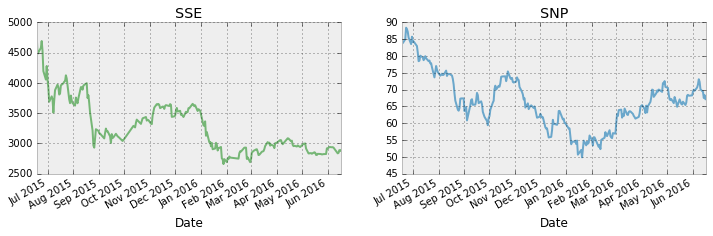

In [382]:
plt.figure(figsize = (12,3))
plt.subplot(121)
sse.Close.plot(color = 'green', alpha = 0.5)
plt.title('SSE')
plt.subplot(122)
snp.Close.plot(alpha = 0.7)
plt.title('SNP')

#### (2) ËÆ°ÁÆóÊó•Êî∂ÁõäÁéá
ÂØπ Close Êï∞ÂÄºËøõË°åÈîôË°åËÆ°ÁÆóÔºåËΩ¨Âåñ‰∏∫ÂØπÊï∞Êî∂ÁõäÁéá

In [383]:
sse['Return'] = (np.log(sse[1:]) - np.log(sse[:-1].values))['Close']*100
snp['Return'] = (np.log(snp[1:]) - np.log(snp[:-1].values))['Close']*100

#### (3) ÁÆÄÂçïÊ∏ÖÁêÜÊï∞ÊçÆÔºåÂà†Èô§Áº∫Â§±ÂÄº

In [384]:
linear = pd.DataFrame({'SSE':sse['Return'], 'SNP': snp['Return']})
linear = linear.dropna(how='any')
linear.head()

SNP       SSE
Date                          
2015-06-19 -0.878968 -6.630435
2015-06-23  3.957828  2.167542
2015-06-24 -0.476297  2.453224
2015-06-25 -0.936506 -3.523281
2015-06-26 -1.969942 -7.684629

#### (4) ÁîªÂõæÁúãÁõ∏ÂÖ≥ÊÄß
‰ªéÂõæ‰∏äÂèØ‰ª•ÁúãÂá∫ÔºåSNP Âíå SSE ÁöÑÁõ∏ÂÖ≥ÊÄßËæÉ‰Ωé

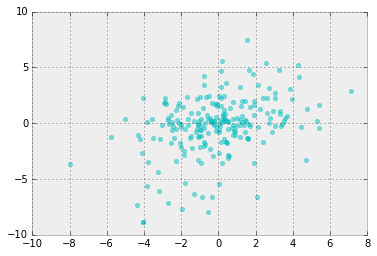

In [385]:
plt.scatter(linear.SNP, linear.SSE, color = 'c', alpha = 0.5)

#### (5) ÂàõÂª∫Á∫øÊÄßÂõûÂΩíÂÖ¨Âºè
ÂéªÊéâÊà™Ë∑ùÈ°πÔºå‰ª•‰∏äËØÅÁªºÊåáÊó•Êî∂ÁõäÁéá‰∏∫Ëß£ÈáäÂèòÈáèÔºå‰ª•‰∏≠Áü≥ÂåñÊó•Êî∂ÁõäÁéá‰∏∫Âõ†ÂèòÈáè

In [386]:
stock_formula =  'SNP ~ -1 + SSE' 
y, x = dmatrices(stock_formula, data=linear, return_type='matrix')

#### (6) Á∫øÊÄßÂõûÂΩíÂàÜÊûêÁªìÊûú
- Ëá™ÂèòÈáè SSE ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ **0.331**Ôºå‰∏î p ÂÄºÂæàÂ∞èÔºåËØ¥Êòé SSE ÁöÑÊó•Êî∂ÁõäÁéáÂèòÂåñÂØπ SNP ÁöÑÂèòÂåñÈáèÂ≠òÂú®ÂΩ±Âìç
- ‰ΩÜË∞ÉÊï¥ÂêéÁöÑ R Êñπ Adj. R-squared Êï∞ÂÄºÂæàÂ∞èÔºåÂè™Êúâ **0.134**Ôºå ËØ¥ÊòéÈô§‰∫Ü SSEÔºåËøòÊúâÈáçË¶ÅÁöÑÂΩ±ÂìçÂèòÈáèÊú™ËÄÉËôëËøõÊù• 
- Âõ†Ê≠§Ôºå‰ª•‰∏äËØÅÁªºÊåáÊó•Êî∂ÁõäÁéá‰∏∫Ëá™ÂèòÈáèÔºå‰∏≠Áü≥ÂåñÊó•Êî∂ÁõäÁéá‰∏∫Âõ†ÂèòÈáèÂª∫Á´ãÁöÑÂõûÂΩíÊ®°ÂûãÔºå‰∏çË∂≥‰ª•Áî®Êù•ËØ¥Êòé‰∏≠Áü≥ÂåñÁöÑÊó•Êî∂ÁõäÁéáÂèòÂåñ  
‰ΩÜ‰∏≠Áü≥ÂåñÊó•Êî∂ÁõäÁéáÁöÑÂèòÂåñÔºå‰ºöÂèóÂà∞‰∏äËØÅÁªºÊåáÊó•Êî∂ÁõäÁéáÂèòÂåñÁöÑÂΩ±Âìç

In [387]:
# Âª∫Á´ãÁ∫øÊÄßÊ®°Âûã
stock_model = sm.OLS(y, x)
# ÊãüÂêà 
stock_fit = stock_model.fit()
# Á∫øÊÄßÂõûÂΩíÊä•Âëä
print(stock_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SNP   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     34.67
Date:                Sun, 19 Jun 2016   Prob (F-statistic):           1.46e-08
Time:                        01:48:32   Log-Likelihood:                -473.74
No. Observations:                 219   AIC:                             949.5
Df Residuals:                     218   BIC:                             952.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SSE            0.3250      0.055      5.888      0.0

---

### 3. Âú®kaggleÁΩëÁ´ô‰∏äÊâæÂà∞titanicÊï∞ÊçÆÔºåÂπ∂‰ΩøÁî®logisticÂõûÂΩíÊù•Âª∫Ê®°ÔºåÁ†îÁ©∂ÂàÜÊûêÊØè‰∏™Âõ†Á¥†ÂØπÂ∫îÁîüÂ≠òÁöÑÈáçË¶ÅÊÄß

#### (1) Êï∞ÊçÆËØªÂèñ
- ÂØπÊï∞ÊçÆÂÆö‰πâÁöÑÂàùÊ≠•ÊÄùËÄÉÔºöÂõ†ÂèòÈáè Survived ‰∏∫0„ÄÅ1ÂàÜÁ±ªÂèòÈáèÔºåËøôÈáåË¶ÅÂàÜÊûê‰∏Ä‰∏™ÊúâÂÖ≥ÊòØ‰∏éÂê¶ÁöÑÈóÆÈ¢òÔºå‰∏îË¶ÅËÄÉÂØüÂêÑÂõ†Á¥†ÁöÑÈáçË¶ÅÊÄßÔºåÁî®Âà∞ÈÄªËæëÂõûÂΩí„ÄÇ
- ‰∫ÜËß£ÂêÑÈ°πÊï∞ÊçÆ‰ª£Ë°®‰ªÄ‰πà
    - pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    - survival : (0 = No; 1 = Yes)
    - sibsp : Number of Siblings/Spouses Aboard
    - parch : Number of Parents/Children Aboard
    - ticket : Ticket Number
    - fare : Passenger Fare
    - embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
train = pd.read_csv("train.csv") 
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### (2) Êï∞ÊçÆÂàùÊ≠•ÊÄªÁªì
1. Ê†∑Êú¨Èáè‰∏∫ 891ÔºåÂØπÂ∫î 12 ‰∏™ÂèòÈáè
2. Cabin Êï∞ÊçÆÊúâËæÉÂ§öÁº∫Â§±ÂÄºÔºåÈáçË¶ÅÂèòÈáèÂπ¥ÈæÑ‰πüÊúâ‰∏ÄÂÆöÁöÑÁº∫Â§±ÂÄº
3. ËÄÉËôë‰ΩøÁî®ÁöÑÂèòÈáè‰∏∫ÔºöÊòØÂê¶ÁîüËøò„ÄÅÊÄßÂà´„ÄÅÂπ¥ÈæÑ„ÄÅËàπËà±„ÄÅÊòØÂê¶‰∏éÂÖÑÂ¶πÊàñÁà∂ÊØçÂ≠êÂ•≥ÂêåËàπ„ÄÅÁ•®‰ª∑‰∏é‰∏äÂ≤∏Âú∞ÁÇπ

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### (3) ÁÆÄÂçïÁöÑÊï∞ÊçÆÊ∏ÖÁêÜ
1. ÂéªÊéâÊöÇ‰∏çÈúÄË¶ÅÁöÑÂàó    
    - ÂâîÈô§ÂßìÂêçÔºå‰πòÂÆ¢ÁºñÂè∑ÔºåËàπÁ•®Âè∑ÂíåÊàøÈó¥Âè∑Ëøô‰∫õÂØπÊòØÂê¶ÁîüËøòÁöÑÂΩ±ÂìçËæÉÂ∞èÁöÑÂèòÈáè
2. Ê∏ÖÁêÜÁº∫Â§±ÂÄº :     
    - ÈóÆÈ¢òÔºöËøôÈáåÊää **Âπ¥ÈæÑ** ‰∏≠ÁöÑÁº∫Â§±ÂÄºÂÖ®ÈÉ®ËΩ¨Êàê‰∏≠‰ΩçÊï∞‰∫ÜÔºåÂØºËá¥ÁöÑÊé¢Á¥¢ÂàÜÊûêÂá∫Áé∞‰∫ÜÂèòÂåñ       
    - ÂàÜÊûêÔºö
        - Êï∞ÊçÆ‰∏≠ÊúâÂæàÂ§öÂπ¥ÈæÑÁº∫Â§±ÂÄºÔºå‰ΩÜÂç≥‰æøÂπ¥ÈæÑÂÄºÁº∫Â§±ÔºåËøô‰∫õÊï∞ÊçÆ‰ªçËÉΩËØ¥ÊòéÂÖ∂‰ªñÈáçË¶ÅÁöÑÂèÇËÄÉÂèòÈáèÔºåÂ¶ÇËàπËà±„ÄÅÊÄßÂà´ÂíåÊòØÂê¶ÁîüËøò
        - ÁîüËøòÂπ¥ÈæÑÊÆµÁöÑÁÆ±Á∫øÂõæÂá∫Áé∞‰∫ÜÂèòÂåñÔºå‰∏≠‰ΩçÊï∞ËôΩÁÑ∂‰∏çÂèòÔºå‰ΩÜÁîüËøòÂπ¥ÈæÑÈõÜ‰∏≠Âú®Èù†Ëøë‰∏≠‰ΩçÊï∞ÁöÑ‰ΩçÁΩÆ‰∫Ü
    - ÂÜ≥ÂÆöÔºö‰ªã‰∫éÂêéÈù¢ÁöÑÈÄªËæëÂõûÂΩíÁªìÊûúÔºåËàπËà±Á≠âÁ∫ß„ÄÅÊÄßÂà´ÂíåÂπ¥ÈæÑÁõ∏ÊØîÔºåÂâç‰∏§ËÄÖÂØπÈÄªËæëÂõûÂΩíÊ®°ÂûãÁöÑÂΩ±ÂìçÊõ¥Â§ßÔºåËøôÈáå‰ªçÁÑ∂‰øùÁïôÂπ¥ÈæÑÁº∫Â§±ÁöÑË°å 

In [5]:
train = train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
train['Age'] = train['Age'].fillna(train['Age'].median())
train= train.dropna(how = 'any')
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


#### (4) Êï∞ÊçÆÂàùÊé¢ Ôºç ÁîªÂõæ

#### ËàπËà± Pclass
ÂàÜËàπËà±ÁúãÁîüËøòÊÉÖÂÜµÔºå‰ªé‰∏ÄÁ≠âËà±Âà∞‰∏âÁ≠âËà±ÔºåÁîüËøòÁöÑÊØîÁéáÈÄêÊ∏êÂáèÂ∞èÔºõ‰∏ÄÁ≠âËà±Âíå‰∫åÁ≠âËà±ÁöÑÁîüËøòÊØîÂ∑Æ‰∏çÂ§öÔºåËÄå‰∏âÁ≠âËà±ÁîüËøòÁöÑÊØîÁéáÂæàÂ∞è„ÄÇ  
ÂàùÊ≠•‰ªéÂõæÂΩ¢‰∏äÁúãÔºåËàπËà±Á≠âÁ∫ßÂèØ‰ª•‰Ωú‰∏∫ÁîüËøòÁöÑ‰∏Ä‰∏™ÂèÇËÄÉÂõ†Á¥†Êù•Áúã„ÄÇ

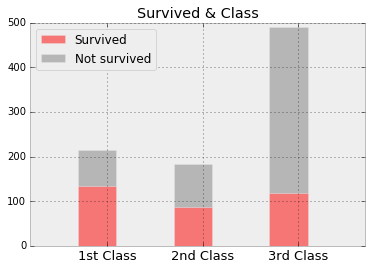

In [100]:
Class = [1, 2, 3]
Class1 = list(train.Pclass[train.Survived == 1].value_counts().sort_index())
Class0 = list(train.Pclass[train.Survived == 0].value_counts().sort_index())
plt.bar(Class, Class1, label = 'Survived', color = 'r', width = 0.4, alpha = 0.5)
plt.bar(Class, Class0, label = 'Not survived', color = 'grey', bottom = Class1, width = 0.4, alpha = 0.5)
plt.title('Survived & Class')
plt.xticks([x + 0.3 for x in Class], ['1st Class', '2nd Class', '3rd Class'], size = 13)
plt.xlim(0.5, 4)
plt.legend(loc=0)

plt.show()

#### ÊÄßÂà´ Sex   
- Â•≥ÊÄßÁîüËøò‰∫∫Êï∞ÁöÑÊØîÁéáÈ´ò‰∫éÁî∑ÊÄßÔºåÊÄßÂà´‰πüÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ÈáçË¶ÅÂèÇËÄÉÂõ†Á¥†Êù•Áúã    
- ‰∏ÄÁÇπÊÄùËÄÉÔºöÁúãËøáÊ≥∞Âù¶Â∞ºÂÖãÂè∑ÁöÑ‰∫∫ÂèØËÉΩ‰ºöËÆ∞ÂæóÔºåÈÄÉÁîüÊó∂ÔºåÊõ¥Â§öÁöÑÁîüÂ≠òÊú∫‰ºöË¢´ËÆ©Áªô‰∫ÜÂ•≥ÊÄß„ÄÇÊâÄ‰ª•ÔºåËôΩÁÑ∂Êàë‰ª¨ËÉΩÁúãÂá∫Êõ¥Â§öÁöÑÂ•≥ÊÄßÁîüËøò‰∫ÜÔºå‰ΩÜ‰∏çËÉΩÁõ¥Êé•‰∏ãÁªìËÆ∫ËØ¥ÔºåÂ•≥ÊÄßÂÖ∑ÊúâÊõ¥Â§öÁöÑÁîüËøòËÉΩÂäõ„ÄÇÁ§ºËÆ©Ëøô‰∏™‰ø°ÊÅØÊòØÊëÜÂú®Êï∞ÊçÆ‰πãÂ§ñÁöÑ„ÄÇËøôÊ†∑ÁúãÔºåËøõ‰∏ÄÊ≠•Ëß£ÈáäÊï∞ÊçÆÊó∂ÔºåËøòÈúÄË¶ÅÂèÇËÄÉÊï∞ÊçÆÁöÑÁõ∏ÂÖ≥‰ø°ÊÅØÔºåÂçïÁúãÊï∞ÊçÆÊú¨Ë∫´ÔºåÂàÜÊûêÂèØËÉΩ‰ºöÂèóÂà∞Â±ÄÈôê„ÄÇ

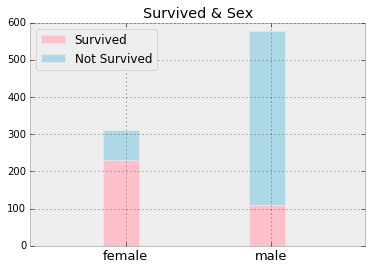

In [101]:
Sex = [0, 1]
Sex0 = list(train.Sex[train.Survived == 0].value_counts().sort_index())
Sex1 = list(train.Sex[train.Survived == 1].value_counts().sort_index())
plt.bar(Sex, Sex1, label='Survived', color = 'pink', width = 0.25)
plt.bar(Sex, Sex0, bottom = Sex1, label='Not Survived',  color = 'lightblue', width = 0.25)
plt.xticks([x+0.155 for x in Sex], ['female', 'male'], size = 13)
plt.xlim(-0.5, 1.8)
plt.title('Survived & Sex')
plt.legend(loc=0)

plt.show()

#### ÁôªËàπÂú∞ÁÇπ Embarked

- ÁîüËøò‰∫∫Êï∞ Southampton > Cherbourg > Queenstown
- ÁîüËøòÊØîÁéá Cherbourgh > Queenstown > Southampton
- ÊÄª‰∫∫Êï∞Â§öÁöÑÂú∞ÁÇπÔºåÁîüËøò‰∫∫Êï∞Ëá™ÁÑ∂‰ºöÂ§ö‰∏Ä‰∫õ„ÄÇ‰æãÂ¶ÇÔºå‰ªé Southampton ÁôªËàπÁöÑ‰∫∫ÂΩì‰∏≠ÔºåÊúâÂæàÂ§ö‰∫∫Ê¥ª‰∫Ü‰∏ãÊù•Ôºå‰ΩÜ Southampton ÊÄªÁöÑÁîüËøòÊØîÁéá‰∏çÈ´ò„ÄÇ     
- ‰∏çÂ§™ËÉΩ‰ªéÂõæÂΩ¢‰∏äÁúãÂá∫ÁôªËàπÂú∞ÁÇπÂØπÁîüËøòÁöÑÂΩ±ÂìçÔºåÂç≥‰æø‰ªéÂ∏∏ËØÜÊù•Êé®Êñ≠ÔºåÁôªËàπÂú∞ÁÇπ‰ºº‰πé‰πü‰∏çÊòØ‰∏Ä‰∏™ÈáçË¶ÅÁöÑÂΩ±ÂìçÂõ†Á¥†„ÄÇ

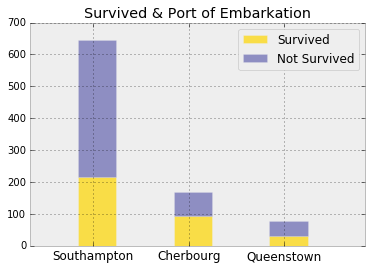

In [102]:
Embarked = [0, 1, 2]
Embarked0 = list(train.Embarked[train.Survived == 0].value_counts())
Embarked1 = list(train.Embarked[train.Survived == 1].value_counts())
plt.bar(Embarked, Embarked1, label='Survived', color = 'gold', alpha = 0.7, width = 0.4)
plt.bar(Embarked, Embarked0, bottom = Embarked1, label='Not Survived',  color = 'navy', alpha = 0.4, width = 0.4)
plt.xticks([x+0.155 for x in Embarked], ['Southampton','Cherbourg', 'Queenstown'], size = 12)
plt.xlim(-0.5, 3)
plt.title('Survived & Port of Embarkation')
plt.legend(loc=0)

plt.show()

#### Âπ¥ÈæÑ
Âç≥‰ΩøËàπËà±‰∏çÂêåÔºå‰ΩÜÁîüËøòÁöÑ‰∫∫‰∏ªË¶ÅÊòØÈùíÂ£ÆÂπ¥

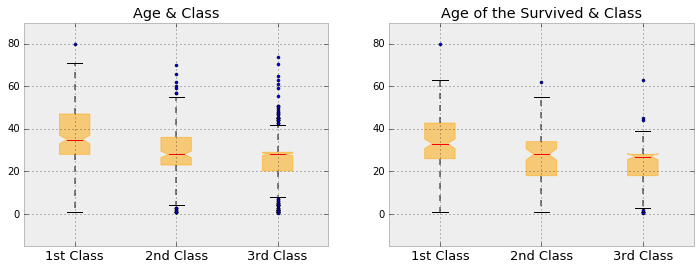

In [103]:
plt.figure(figsize = (12,4))
plt.subplot(121)
Survived_age_class1 = list(train.Age[train.Pclass == 1])
Survived_age_class2 = list(train.Age[train.Pclass == 2])
Survived_age_class3 = list(train.Age[train.Pclass == 3])
box = plt.boxplot([Survived_age_class1, Survived_age_class2, Survived_age_class3], [1,2,3], patch_artist=True)
plt.setp(box['boxes'], color='orange', alpha = 0.5)
plt.setp(box['whiskers'], color='grey', linewidth = 2)
plt.setp(box['fliers'], marker = 'o', markersize = 3)
plt.xticks([x for x in Class], ['1st Class', '2nd Class', '3rd Class'], size = 13)
plt.title('Age & Class')
plt.ylim(-15, 90)

plt.subplot(122)
Survived_age_class1 = list(train.Age[train.Survived == 1][train.Pclass == 1])
Survived_age_class2 = list(train.Age[train.Survived == 1][train.Pclass == 2])
Survived_age_class3 = list(train.Age[train.Survived == 1][train.Pclass == 3])
box = plt.boxplot([Survived_age_class1, Survived_age_class2, Survived_age_class3], [1,2,3], patch_artist=True)
plt.setp(box['boxes'], color='orange', alpha = 0.5)
plt.setp(box['whiskers'], color='grey', linewidth = 2)
plt.setp(box['fliers'], marker = 'o', markersize = 3)
plt.xticks([x for x in Class], ['1st Class', '2nd Class', '3rd Class'], size = 13)
plt.title('Age of the Survived & Class')
plt.ylim(-15, 90)

plt.show()

#### Áà∂ÊØç„ÄÅÂ≠êÂ•≥„ÄÅÂÖÑÂ¶π„ÄÅÈÖçÂÅ∂ÂêåËàπÊÉÖÂÜµ
ÂçïÁã¨ÁôªËàπÁöÑ‰∫∫ÔºåÁîüËøòÊØî‰æã‰∏çÊòØÊúÄÈ´òÁöÑÔºõËôΩÁÑ∂ÂçïÁã¨ÁôªËàπÁöÑÁîüËøò‰∫∫Êï∞ÊúÄÂ§öÔºå‰ΩÜ‰∏ªË¶ÅÂõ†‰∏∫ËøôÈÉ®ÂàÜ‰∫∫Âç†ÊÄª‰∫∫Êï∞ÊØî‰æãÊúÄÂ§ß   
Âè¶Â§ñÔºå‰ªéÂõæ‰∏äÁúãÊù•ÔºåÂú®Êúâ‰∏ÄÂà∞‰∏§‰ΩçÂÆ∂‰∫∫Èô™‰º¥ÁöÑÊÉÖÂÜµ‰∏ãÔºåÁîüËøòÁöÑÊØî‰æãÁ®çÂ§ß

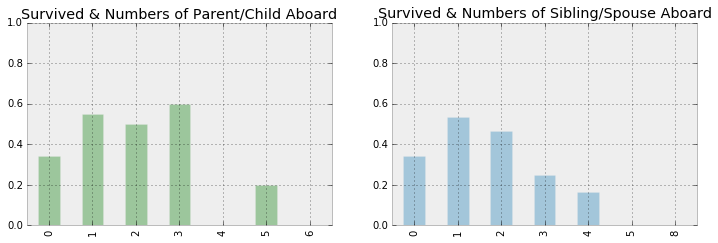

In [104]:
fig = plt.figure(figsize=(12, 8), dpi=900) 

plt.subplot(221)
Pch_survived = train.Parch[train.Survived == 1].value_counts().sort_index()/train.Parch.value_counts().sort_index()
Pch_survived.fillna(0)
Pch_survived.plot.bar(color = 'forestgreen', alpha = 0.4)
plt.title('Survived & Numbers of Parent/Child Aboard')
plt.ylim(0, 1)

plt.subplot(222)
Sib_survived = train.SibSp[train.Survived == 1].value_counts().sort_index()/train.SibSp.value_counts().sort_index()
Sib_survived.fillna(0)
Sib_survived.plot.bar(alpha = 0.4)
plt.title('Survived & Numbers of Sibling/Spouse Aboard')
plt.ylim(0, 1)

plt.show()

#### (4) ÈÄªËæëÂõûÂΩí
- ÈÄöÂ∏∏ÊÉÖÂÜµ‰∏ãÔºåÈÄªËæëÂõûÂΩíÁî®Êù•Ëß£Á≠î‰∏Ä‰∏™‰∫åÂàÜÈóÆÈ¢òÔºåÂç≥Âõ†ÂèòÈáèÂèØ‰ª•Ë°®Á§∫‰∏∫ 0 Êàñ 1 „ÄÇÂõ†ÂèòÈáèÊòØÂàÜÁ±ªÂèòÈáèÔºåËá™ÂèòÈáèÂ∏∏Â∏∏‰∏∫ËøûÁª≠ÂèòÈáè„ÄÇ
- ÁÆÄÂçïÊù•ËØ¥ÔºåÈÄªËæëÂõûÂΩíÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ÂàÜÁ±ªÂô®ÔºåËã• p > 0.5 ÂèØÂΩí‰∏∫ 1 Á±ªÔºõp < 0.5ÔºåÂèØÂΩí‰∏∫ 0 Á±ª„ÄÇ

#### Ê≥∞Âù¶Â∞ºÂÖãÁîüËøòÊ°à‰æã
ÈÇ£‰πàÔºåÂàÜÊûê‰πòÂÆ¢ÊòØÂê¶ÁîüËøòÁöÑÈóÆÈ¢ò‰πüÂ∞±ÂèØ‰ª•ËΩ¨Âåñ‰∏∫‰∏Ä‰∏™ÈÄªËæëÂõûÂΩíÈóÆÈ¢ò„ÄÇ
- Á¨¨‰∏ÄÊ≠•ÂèØ‰ª•ËØïÁùÄËÆ°ÁÆóÊØè‰∏™‰πòÂÆ¢ÁîüËøòÁöÑÂèØËÉΩÊÄßÊõ¥ÂÆπÊòì‰∏∫ 0 Êàñ 1„ÄÇ    

- ÈóÆÈ¢òÔºöÁ¨¨‰∏ÄÊ≠•Âè™ÊòæÁ§∫‰∫ÜÁîüËøòÁöÑÂèØËÉΩÊÄßÔºå‰ΩÜÁîüËøòÂèØËÉΩÊÄß‰∏çËÉΩËØ¥Êòé‰∏Ä‰∏™‰∫∫ÊúÄÂêéÊúâÊ≤°ÊúâÊ¥ª‰∏ãÊù•„ÄÇ   
Âõ†Ê≠§ÔºåÊàë‰ª¨ÈúÄË¶ÅÊääÂèØËÉΩÊÄßËΩ¨Âåñ‰∏∫‰∫åÂàÜÔºà 0 Êàñ 1 ÔºâÂÜ≥Á≠ñ„ÄÇ     
- Ëß£ÂÜ≥ÔºöÂèØ‰ª•Â∞ùËØïÁùÄÊääÁîüÂ≠òÁéáË∂ÖËøá50%ÁöÑ‰∫∫ÂàíÂàÜ‰∏∫ÁîüËøòÁöÑÈÇ£ÈÉ®ÂàÜ‰∫∫ÔºåËøôÊó∂ÂèØ‰ª•ËÄÉËôëÈÄªËæëÂõûÂΩí„ÄÇ

#### ÈÄªËæëÂõûÂΩíÂÆûÁé∞Ê≠•È™§
1. ÂÆö‰πâÈÄªËæëÂõûÂΩíÂÖ¨Âºè    
2. Âª∫Á´ãÈÄªËæëÂõûÂΩíÊï∞ÊçÆÊ°Ü
3. ËÆæÁΩÆÂõûÂΩíÊ®°Âûã
4. ÊãüÂêà
5. Ê£ÄÊü•ÊÆãÂ∑Æ

#### ÊØè‰∏™Âõ†Á¥†ÂØπÁîüÂ≠òÁöÑÈáçË¶ÅÊÄß
1. ÂÖàÂâîÈô§ P ÂÄºËæÉÂ§ßÁöÑÂèòÈáèÔºö     
Fare, Parch, EmbarkÔºåËøô‰∏â‰∏™ÂÄº P ÂÄºËæÉÂ§ßÔºåËØ¥ÊòéÂèòÈáèÂØπÊòØÂê¶ÁîüËøòÁöÑÂΩ±ÂìçÂæàÂ∞è
2. ÂÜçÁúãÁõ∏ÂÖ≥Á≥ªÊï∞ÔºåËá™ÂèòÈáèÂØπÊòØÂê¶ÁîüËøòÁöÑÂΩ±ÂìçÊéíÂêçÂ¶Ç‰∏ãÔºö    
Sex > Class > Numbers of Siblings/Spouse > Age    
ÂΩ±ÂìçËæÉÂ§ßÁöÑ‰∏∫ÊÄßÂà´ÂíåËàπËà±Á≠âÁ∫ßÔºåÂÖÑÂ¶πÈÖçÂÅ∂ÂêåËàπÁöÑÂΩ±ÂìçÁõ∏ÂØπËæÉÂº±ÔºåÂπ¥ÈæÑÂØπÊòØÂê¶ÁîüËøòÁöÑÂΩ±ÂìçÊúÄÂº±
3. Ê®°ÂûãÊãüÂêà
    - Á∫øÊÄßÂõûÂΩíËøêÁî®ÊúÄÂ∞è‰∫å‰πòÊ≥ïÔºåËÄåÈÄªËæëÂõûÂΩíÁî®Âà∞‰∫ÜÊûÅÂ§ß‰ººÁÑ∂‰º∞ËÆ°„ÄÇËøõË°åÈÄªËæëÂõûÂΩíÁöÑÊó∂ÂÄôÔºåÂÖ∂ÂÆûÂπ∂‰∏çÂ≠òÂú®‰∏Ä‰∏™ÁúüÊ≠£ÂØπÂ∫îÁöÑRÊñπÊù•Ê£ÄÈ™åÈÄªËæëÂõûÂΩíÊ®°Âûã„ÄÇÈÄªËæëÂõûÂΩíÊ®°ÂûãÊòØ‰æùÊçÆ‰ººÁÑ∂ÊÉÖÂÜµËÄåÂÜ≥ÂÆöÁöÑ„ÄÇ‰∏∫‰∫ÜËØÑ‰ª∑ÈÄªËæëÂõûÂΩíÁöÑÊãüÂêàÁ®ãÂ∫¶ÔºåÁªüËÆ°Â≠¶ÂÆ∂ÂàõÈÄ†‰∫Ü‰º™ R ÊñπÔºå‰º™ R ÊñπÁöÑËÆ°ÁÆóÂÖ¨Âºè‰πüËæÉÂ§ö [ÊÄªÁªìË°®Ê†º](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/Psuedo_RSquareds.htm)
    - ‰º™ R ÊñπÁúãËµ∑Êù•Âíå R ÊñπÂ∑Æ‰∏çÂ§öÔºåÂèñÂÄºÂú® 0 Âà∞ 1 ‰πãÈó¥Ôºå‰º™ R ÊñπË∂äÂ§ßË°®Á§∫Ê®°ÂûãÊãüÂêàÂæóË∂äÂ•Ω
    - ‰º™ R ÊñπÁöÑ McFadden's ÂÖ¨ÂºèÔºö
    - <img src="http://www.ats.ucla.edu/stat/mult_pkg/faq/general/McFadden.jpg" width="47%" height="100%" style="float:left"/>
    
    - Mfull ‰∏∫Ê®°ÂûãÁöÑ‰ººÁÑ∂‰º∞ËÆ°ÂÄºÔºåMintercept ‰∏∫‰∏Ä‰∏™ÂÅáËÆæÊï∞ÂÄºÔºåÂç≥Ê®°ÂûãÂè™ÂèóÊà™Ë∑ùÂΩ±ÂìçÁöÑÂèØËÉΩÊÄß„ÄÇÂ¶ÇÊûú‰∏Ä‰∏™Ê®°ÂûãÊãüÂêàÁöÑ‰∏çÂ•ΩÔºåÊûÅÂ§ß‰ººÁÑ∂ÂÄºÂíåÂè™ÂèóÊà™Ë∑ùÂΩ±ÂìçÂÄºÁöÑÂ∑ÆÂà´‰∏çÂ§ßÔºå‰∏§ËÄÖÂèñÂØπÊï∞Áõ∏Èô§ÁöÑÁªìÊûúÂæàÊé•Ëøë1ÔºåËÄå‰º™ R Êñπ  McFadden's ÁÆóÂºèÁöÑÁªìÊûú‰πüÂ∞±ÂæàÊé•Ëøë 0
    - ‰∏ãÈù¢Âª∫Á´ãÁöÑÈÄªËæëÂõûÂΩíÔºåÂÖ∂ÁªìÊûúÁöÑ‰º™ R ÊñπËæÉÂ∞èÔºåËØ¥ÊòéÊãüÂêàÁöÑ‰∏çÂ§™Â•Ω„ÄÇÂéªÊéâ‰∏çÊòæËëóÁöÑÂèòÈáè‰ª•ÂêéÔºå‰º™ R Êñπ‰ªçÊ≤°ÊúâËæÉÂ§ßÂèòÂåñÔºåËØ¥ÊòéËøô‰∫õËá™ÂèòÈáèËøò‰∏çË∂≥‰ª•ËØ¥ÊòéÂÖ∂Âõ†ÂèòÈáè


In [105]:
# Áî® pasty dmatrices ÂáΩÊï∞ÂàõÂª∫Êï∞ÊçÆÊ°ÜÔºåËÆæÁΩÆÂàÜÁ±ªÂèòÈáè C()
logit_formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)+ Fare' 
y, x = dmatrices(logit_formula, data = train, return_type = 'dataframe')

# ËÆæÁΩÆÂõûÂΩíÊ®°Âûã
model = sm.Logit(y,x)

# Áî®ËÆ≠ÁªÉÊï∞ÊçÆÊù•ÊãüÂêàÊ®°Âûã
res = model.fit()

# ÊòæÁ§∫ÈÄªËæëÂõûÂΩíÊä•Âëä
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.441182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Jun 2016   Pseudo R-squ.:                  0.3368
Time:                        19:43:48   Log-Likelihood:                -392.21
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 3.013e-80
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.0625      0.473      8.594      0.000         3.136     4.989
C(Pclass)[T

### ÁªÉ‰π†

#### (5) ÊîØÊåÅÂêëÈáèÊú∫ Ôºç ÂΩì‰∏ÄÊù°Áõ¥Á∫ø‰∏çË∂≥‰ª•ÂàíÂàÜ‰∏çÂêåÁ±ªÂà´ÁöÑÊó∂ÂÄô

#### ÈÄªËæëÂõûÂΩíÈÅáÂà∞ÁöÑÈóÆÈ¢ò
- ÂõûÂà∞Ê≥∞Âù¶Â∞ºÂÖãÂè∑ÁîüËøòÊ°à‰æãÔºö   
  Â¶ÇÊûúÊàë‰ª¨Áî®Âπ¥ÈæÑÊù•È¢ÑÊµãÊòØÂê¶ÁîüËøòÔºåÂàô‰ºöÂæóÂà∞‰∏Ä‰∏™Á∫øÊÄßÂà§ÂÆöËæπÁïåÔºö‰æãÂ¶ÇÔºå‰ª•Âπ¥ÈæÑ‰∏∫Ëá™ÂèòÈáèÔºåÁîüËøòÁªìÊûú‰∏∫Âõ†ÂèòÈáèÔºåÂÖ≥‰∫éÂπ¥ÈæÑÁöÑÁîüËøòÁ§∫ÊÑèÂõæÂàô‰∏∫‰∏ÄÊù°Áõ¥Á∫ø„ÄÇËØ¶ÁªÜ‰∫õËØ¥ÔºåÂπ¥ËΩª‰∏Ä‰∫õÁöÑ‰∫∫ÂèØËÉΩÊúâÊõ¥Â§öÁöÑÊú∫‰ºöÁîüËøò„ÄÇ   
  ‰∫ãÂÆû‰∏äÔºåÂπ¥ÈæÑÁîüËøòÁ§∫ÊÑèÂõæÂèØËÉΩÊòØ‰∏ÄÊù°Êõ≤Á∫ø ‚Äì‚Äì ÈùíÂπ¥‰∫∫ÁîüËøòÁöÑÂèØËÉΩÊÄßÊõ¥È´òÔºåËÄåÂπ¥ÂπºÂíåÂπ¥ÈïøÁöÑ‰∫∫ÁîüËøòÁöÑÂèØËÉΩÊÄßÁõ∏ÂØπËæÉ‰Ωé„ÄÇ    
  ÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºåÈÄªËæëÂõûÂΩíÂè™ËÉΩ‰º∞ÊµãÁ∫øÊÄßÂà§ÂÆöËæπÁïå„ÄÇÂ§ÑÁêÜÂ§öÁª¥Âà§ÂÆöËæπÁïåÊó∂ÔºåÂèØ‰ª•ËÄÉËôëÊîØÊåÅÂêëÈáèÊú∫ÊàñÂÜ≥Á≠ñÊ†ë„ÄÇ
 
#### Âü∫Êú¨ÊÄùÊÉ≥
- ÊîØÊåÅÂêëÈáèÊú∫ÂèØ‰ª•ÊääÊ®°ÂûãËΩ¨Êç¢Âà∞‰∏çÂêåÁöÑÊï∞Â≠¶Áª¥Â∫¶‰∏≠ÔºåÊù•ÂÆåÊàêÈÄªËæëÂõûÂΩí‰∏çËÉΩÂÆåÊàêÁöÑ‰ªªÂä°     
- ÂÆÉÁöÑÂü∫Êú¨ÊÄùÊÉ≥ÊòØÔºåÊâæÂà∞‰∏Ä‰∏™Ë∂ÖÂπ≥Èù¢ÔºåÊù•Êää N Áª¥Êï∞ÊçÆÂÆåÁæéÂú∞ÂàÜÂâ≤Âà∞‰∏§‰∏™Á±ªÂà´‰πã‰∏≠     
- üëá[ÂÖ≥‰∫éÊîØÊåÅÂêëÈáèÊú∫ÁöÑ‰∏Ä‰∏™‰ªãÁªç](https://www.zhihu.com/question/21094489)

#### ÊîØÊåÅÂêëÈáèÊú∫ÁöÑ‰ª£Á†ÅÂÆûÁé∞
- Êï∞ÊçÆÂáÜÂ§á
    - Âª∫Á´ãÂÖ¨ÂºèÔºåÂ∞ÜÂÖ¨Âºè xÔºåy ‰∏§ËæπËΩ¨‰∏∫ numpy array
    - ÈÄâÊã©Áî®Êù•ÂàÜÊûêÁöÑ‰∏§‰∏™ÂèòÈáèÔºåÂêåÊó∂ y ÂÄºËΩ¨1Áª¥ üëá[np.ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)
    - ÈöèÊú∫ÊéíÂàó xÔºåy ÂÄº
    - ËÆæÁΩÆ‰∫§ÂèâÈ™åËØÅ
- ÊãüÂêà 
    - svm.SVC(kernel, gamma)
    - fit X_train & y_train
    
- [cmapËâ≤Ë°®](http://matplotlib.org/examples/color/colormaps_reference.html) 

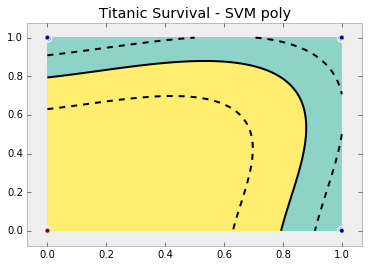

In [106]:
# ËÆæÁ´ãÂÖ¨ÂºèÔºåÂª∫Á´ãÊï∞ÊçÆÊ°Ü
SVM_formula =  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp' 
y, x = dmatrices(SVM_formula, data=train, return_type='matrix')

# Â∞ÜÂÖ¨ÂºèÊï∞ÊçÆÊ°Ü‰∏≠ÁöÑÊï∞ÊçÆÊîæÂÖ• numpy array
# ÊåëÈÄâÊÑüÂÖ¥Ë∂£ÁöÑÂèòÈáèÊù•ÂàÜÊûê:ÈÄöËøáÂàöÊâçÁöÑÂõûÂΩíÂàÜÊûêÔºåÂ∑≤Áü•ÊÄßÂà´ÂíåËàπËà±ÂØπÊòØÂê¶ÁîüËøòÁöÑÂΩ±ÂìçËæÉÂ§ßÔºåËøôÈáåÈÄâÊã©‰ª£Ë°®ÊÄßÂà´ 3 ÂíåËàπËà± 2 ÁöÑ‰∏§ÂàóÊù•ÂàÜÊûê
X = np.asarray(x)
# y ÂÄºÊòØËøôÊ†∑ÁöÑÊï∞ÊçÆÔºåarray([[ 0.], [ 1.], [ 1.], [ 1.] ...]), Áî® np.ravel() ËΩ¨Êç¢‰∏∫ array([ 0.,  1.,  1.,  1.,  0.,  0., ...])
y = np.asarray(y).ravel()
X = X[:,[2, 3]]  

# ÈöèÊú∫ÊéíÂàó x, yÂÄº 
np.random.seed(123)
order = np.random.permutation(len(x))
X = X[order]
y = y[order].astype(np.float)

# ÂÅö‰∏Ä‰∏™‰∫§ÂèâÈ™åËØÅÔºåÂâç80%ÁöÑÊï∞ÊçÆÁî®Êù•ËÆ≠ÁªÉÔºåÂêé20%ÁöÑÊï∞ÊçÆÁî®Êù•Ê£ÄÈ™å
nighty_precent_of_sample = int(.8 * len(x))
X_train = X[:int(.8 * len(x))]
y_train = y[:int(.8 * len(x))]
X_test = X[int(.8 * len(x)):]
y_test = y[int(.8 * len(x)):]

# ÊãüÂêà
# gamma ÂèÇÊï∞: ÂèÇÊï∞ gamma Ë°®Á§∫Ë∂ÖÂπ≥Èù¢ÁöÑÁ∫øÊÄßÂπ≥ÊªëÂ∫¶ÔºåÂΩì‰ΩøÁî®Á∫øÊÄßÊ†∏ÂáΩÊï∞ÊûÑÂª∫ SVM Êó∂ÔºåÊ®°Âûã‰∏≠‰∏çÂ≠òÂú® gamma ÂèÇÊï∞„ÄÇ
# Êàë‰ª¨Áü•ÈÅì: gamma Ë∂äÂ∞èÔºåË∂ÖÂπ≥Èù¢Ë∂äÊé•Ëøë‰∫éÁõ¥Á∫øÔºå‰ΩÜÊòØÂ¶ÇÊûú gamma ÈÄâÂèñËøáÂ§ßÔºåË∂ÖÂπ≥Èù¢Â∞Ü‰ºöÂèòÂæóÈùûÂ∏∏ÂºØÊõ≤ÔºåËøô‰ºöÂØºËá¥ËøáÂ∫¶ÊãüÂêàÈóÆÈ¢ò„ÄÇ
poly = svm.SVC(kernel='poly', gamma=2.5)
poly.fit(X_train, y_train)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10)

# ÊèèÂá∫ËÆ≠ÁªÉÊï∞ÊçÆ
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = poly.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set3)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

plt.title('Titanic Survival - SVM poly')
plt.show()

#### (6) ÈöèÊú∫Ê£ÆÊûó

#### ‰ªÄ‰πàÊòØÈöèÊú∫Ê£ÆÊûóÔºü   
ÈöèÊú∫Ê£ÆÊûó‰ºöÁîüÊàêÂæàÂ§öÁöÑÂÜ≥Á≠ñÊ†ëÔºåÂΩìÊàë‰ª¨Âü∫‰∫éÊüê‰∫õÂ±ûÊÄßÂØπ‰∏Ä‰∏™Êñ∞ÁöÑÂØπË±°ËøõË°åÂàÜÁ±ªÂà§Âà´Êó∂ÔºåÈöèÊú∫Ê£ÆÊûó‰∏≠ÁöÑÊØè‰∏ÄÊ£µÊ†ëÈÉΩ‰ºöÁªôÂá∫Ëá™Â∑±ÁöÑÂàÜÁ±ªÈÄâÊã©ÔºåÂπ∂Áî±Ê≠§ËøõË°å‚ÄúÊäïÁ•®‚ÄùÔºåÊ£ÆÊûóÊï¥‰ΩìÁöÑËæìÂá∫ÁªìÊûúÂ∞Ü‰ºöÊòØÁ•®Êï∞ÊúÄÂ§öÁöÑÂàÜÁ±ªÈÄâÈ°π„ÄÇËÄåÂú®ÂõûÂΩíÈóÆÈ¢ò‰∏≠ÔºåÈöèÊú∫Ê£ÆÊûóÁöÑËæìÂá∫Â∞Ü‰ºöÊòØÊâÄÊúâÂÜ≥Á≠ñÊ†ëËæìÂá∫ÁöÑÂπ≥ÂùáÂÄº

#### ÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÊòØÂ¶Ç‰ΩïÂ∑•‰ΩúÁöÑÔºüÂú®ÈöèÊú∫Ê£ÆÊûó‰∏≠ÔºåÊØè‰∏Ä‰∏™ÂÜ≥Á≠ñÊ†ë‚ÄúÁßçÊ§ç‚ÄùÂíå‚ÄúÁîüÈïø‚ÄùÁöÑËßÑÂàôÂ¶Ç‰∏ãÊâÄÁ§∫Ôºö     
- ÂÅáËÆæÊàë‰ª¨ËÆæÂÆöËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊ†∑Êú¨‰∏™Êï∞‰∏∫NÔºåÁÑ∂ÂêéÈÄöËøáÊúâÈáçÁΩÆÁöÑÈáçÂ§çÂ§öÊ¨°ÊäΩÊ†∑Êù•Ëé∑ÂæóËøôN‰∏™Ê†∑Êú¨ÔºåËøôÊ†∑ÁöÑÊäΩÊ†∑ÁªìÊûúÂ∞Ü‰Ωú‰∏∫Êàë‰ª¨ÁîüÊàêÂÜ≥Á≠ñÊ†ëÁöÑËÆ≠ÁªÉÈõÜ    
- Â¶ÇÊûúÊúâM‰∏™ËæìÂÖ•ÂèòÈáèÔºåÊØè‰∏™ËäÇÁÇπÈÉΩÂ∞ÜÈöèÊú∫ÈÄâÊã©m(m<M)‰∏™ÁâπÂÆöÂèòÈáèÔºåÁÑ∂ÂêéËøêÁî®Ëøôm‰∏™ÂèòÈáèÊù•Á°ÆÂÆöÊúÄ‰Ω≥ÂàÜË£ÇÁÇπ„ÄÇÂú®ÂÜ≥Á≠ñÊ†ëÁöÑÁîüÊàêËøáÁ®ã‰∏≠ÔºåmÁöÑÂÄºÊòØ‰øùÊåÅ‰∏çÂèòÁöÑ    
- ÊØèÊ£µÂÜ≥Á≠ñÊ†ëÈÉΩÊúÄÂ§ßÂèØËÉΩÂú∞ËøõË°åÁîüÈïøËÄå‰∏çËøõË°åÂâ™Êûù     
- ÈÄöËøáÂØπÊâÄÊúâÁöÑÂÜ≥Á≠ñÊ†ëËøõË°åÂä†ÊÄªÊù•È¢ÑÊµãÊñ∞ÁöÑÊï∞ÊçÆÔºàÂú®ÂàÜÁ±ªÊó∂ÈááÁî®Â§öÊï∞ÊäïÁ•®ÔºåÂú®ÂõûÂΩíÊó∂ÈááÁî®Âπ≥ÂùáÔºâ       

.
<img src="http://image.slidesharecdn.com/janvitekdistributedrandomforest5-2-2013-130504133205-phpapp02/95/jan-vitek-distributedrandomforest522013-8-638.jpg?cb=1367674437" width="47%" height="100%" style="float:left"/>

In [107]:
import sklearn.ensemble as ske

# ÂàõÂª∫ÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
Forest_formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp' 
y, x = dmatrices(Forest_formula, data=train, return_type='dataframe')
# y ËΩ¨ 1 Áª¥
y = np.asarray(y).ravel()
# ÊääÊï∞ÊçÆÊãüÂêàËøõÊãüÂêàÊ®°Âûã
results = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# ÊòæÁ§∫ÁªìÊûúÔºåÁ≤æÁ°ÆÂ∫¶ÂæàÁêÜÊÉ≥Ôºå‰∏∫0.9
results.score(x, y)

0.90213723284589431

---

### 4. ÊêúÈõÜÊüê‰∏™ÂüéÂ∏ÇËøáÂéª 1 ‰∏™ÊúàÁöÑ PM2.5 Â∞èÊó∂Á∫ßÊï∞ÊçÆÔºåÊ†πÊçÆÊó∂Èó¥Â∫èÂàóÈ¢ÑÊµãÊñπÊ≥ïËøõË°åÈ¢ÑÊµã

#### (1) ËØªÂèñÂíåÊ∏ÖÁêÜÊï∞ÊçÆ
- Êï∞ÊçÆÊ∫ê http://young-0.com/airquality/  
ÊäΩÂèñ 5 Êúà‰∏ÄÊï¥ÊúàÁöÑÊï∞ÊçÆÔºåÈ¢ÑÊµã 6 Êúà 1 Âà∞ 5 Âè∑ÁöÑ pm2.5 ÊÉÖÂÜµ

In [400]:
pm = pd.read_csv('AQIbeijing.csv', header = None)
pm.head()

0     1    2     3     4
0       day  hour  avg  conc  city
1  01/05/16     0  199   148     0
2  01/05/16     1  199   149     0
3  01/05/16     2  204   154     0
4  01/05/16     3  197   144     0

**Êó∂Èó¥Êï∞ÊçÆÊ∏ÖÁêÜ**ÔºöËøôÈáåÊó•Êúü‰∏éÂ∞èÊó∂Êï∞ÊçÆÂàÜÂºÄ‰∫ÜÔºåÊ∏ÖÁêÜÊï∞ÊçÆÁöÑÊó∂ÂÄôÊ≠£Â•ΩÂ§ç‰π†‰∏ÄÈÅç datetime
 - ÂÖàÊääÊó∂Èó¥ËΩ¨Êàê datetime ËÆ§ÂèØÁöÑÂΩ¢ÂºèÔºåÂÜçÁî® strptime Â∞Ü string ËΩ¨‰∏∫ datetime ÂΩ¢Âºè
 - Ê≥®ÊÑè pm.date Âíå pm['date'] ÁöÑÂå∫Âà´

In [401]:
pm.columns = pm.iloc[0,:]
pm = pm.drop(0)

pm.date = pm.day + ' ' + pm.hour + ':00:00'
pm['date'] = pm.date.apply(lambda x : datetime.strptime(x, '%d/%m/%y %H:%M:%S'))
pm = pm.set_index('date')

pm['avg'] = pm['avg'].astype(float)
pm = pm[['avg']]

pm.head()

0                      avg
date                      
2016-05-01 00:00:00  199.0
2016-05-01 01:00:00  199.0
2016-05-01 02:00:00  204.0
2016-05-01 03:00:00  197.0
2016-05-01 04:00:00  215.0

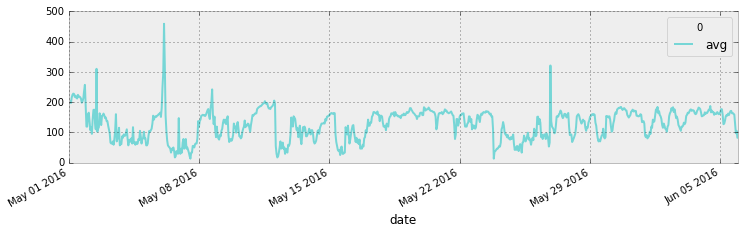

In [402]:
pm.plot(figsize = (12,3), color = 'c', alpha = 0.5)
plt.show()

#### (2) Êü•ÁúãÂéÜÂè≤Êï∞ÊçÆ‰∏éÊú™Êù•Êï∞ÊçÆÊòØÂê¶Ëá™Áõ∏ÂÖ≥
- Èó¥Èöî 1 Â∞èÊó∂‰∏éÈó¥Èöî 24 Â∞èÊó∂ÁöÑËá™Áõ∏ÂÖ≥ÊÉÖÂÜµ
    - Èó¥Èöî 1 Â∞èÊó∂ÁöÑËá™Áõ∏ÂÖ≥ÊÄßËøò‰∏çÈîôÔºåÂèØ‰ª•‰ªéÂõæ‰∏äÁúãÂá∫Áõ∏ÂÖ≥Á≥ªÊï∞ÂõæÂÉèÊé•Ëøë‰∏ÄÊù°Áõ¥Á∫ø
    - Èó¥Èöî 24 Â∞èÊó∂ÁöÑËá™Áõ∏ÂÖ≥ÊÄßÂ∞±‰∏çÂ§™ÁêÜÊÉ≥‰∫ÜÔºåÂõæÂΩ¢‰∏çÂëà‰∏ÄÊù°Áõ¥Á∫ø

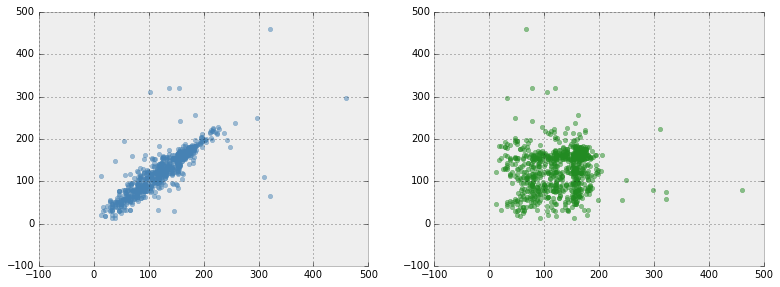

In [403]:
plt.figure(figsize=(13,10))
plt.subplot(221)
plt.scatter(pm[1:], pm[:-1], color = 'steelblue', alpha = 0.5, s = 20)
plt.subplot(222)
plt.scatter(pm[24:], pm[:-24], color = 'forestgreen', alpha = 0.5, s = 20)

#### (3) Ê±ÇÂ∑ÆÂàÜ
- ÂÅöÂ∑ÆÂàÜÊòØ‰∏∫‰∫Ü‰øùËØÅÊó∂Èó¥Â∫èÂàóÁöÑË°å‰∏∫‰∏çÈöèÊó∂Èó¥ÂèòÂåñËÄå‰∏ÄÁõ¥ÊîπÂèò„ÄÇÂπ≥Á®≥ÊÄßÂèØ‰ª•Áúã‰ΩúÊó∂Èó¥Â∫èÂàóÁöÑÂÜÖÈÉ®ÈÄªËæëÊÄßÔºåÂç≥ÊØè‰∏ÄÊúüÁöÑÂ∫èÂàóÂÄº‰∏éÂâçÂá†Êúü‰πãÈó¥Â≠òÂú®‰∏ÄËá¥ÁöÑÁªìÊûÑÊÄßÂèòÂåñÂÖ≥Á≥ª„ÄÇÊª°Ë∂≥‰∫ÜÂπ≥Á®≥ÊÄßÁöÑÂâçÊèêÔºåÊàë‰ª¨ÊâçËÉΩÂª∫Á´ãÊ®°ÂûãÂéªÂàÜÊûêÂíåÈ¢ÑÊµã„ÄÇ
- ÂèØ‰ªéÂõæ2ÁúãÂá∫ÔºåÂÅöËøá1Èò∂Â∑ÆÂàÜÂêéÔºåpm2.5 ÁöÑÊó∂Èó¥Â∫èÂàóÂ∑≤ÊØîËæÉÂπ≥Á®≥„ÄÇ

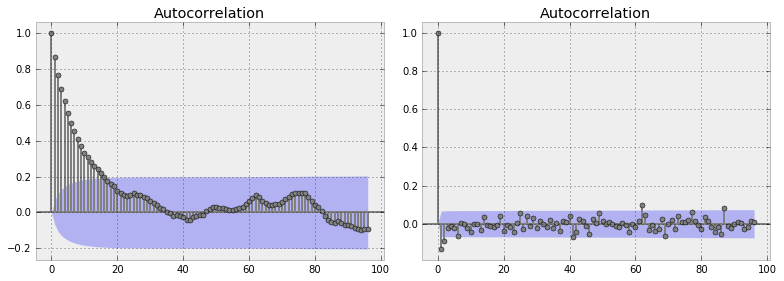

In [404]:
fig, axes = plt.subplots(1, 2, figsize = (11, 4))
smg.tsa.plot_acf(pm.avg, lags = 96, ax = axes[0], color = 'grey')
# ‰∏ÄÈò∂Â∑ÆÂàÜ
smg.tsa.plot_acf(pm.avg.diff().dropna(), lags = 96, ax = axes[1], color = 'grey')
fig.tight_layout()

#### (4) Âª∫Á´ã AR Ëá™Áõ∏ÂÖ≥ÂõûÂΩíÊ®°ÂûãÂπ∂Ê£ÄÈ™åÂèÇÂ∑Æ
ARÊ®°ÂûãÁöÑÂÆûÁé∞Ê≠•È™§Ôºö
1. Ê†πÊçÆÊó∂Èó¥Â∫èÂàóÁöÑÊï£ÁÇπÂõæ„ÄÅËá™Áõ∏ÂÖ≥ÂáΩÊï∞ÂíåÂÅèËá™Áõ∏ÂÖ≥ÂáΩÊï∞Âõæ‰ª•ADFÂçï‰ΩçÊ†πÊ£ÄÈ™åÂÖ∂ÊñπÂ∑Æ„ÄÅË∂ãÂäøÂèäÂÖ∂Â≠£ËäÇÊÄßÂèòÂåñËßÑÂæãÔºåÂØπÂ∫èÂàóÁöÑÂπ≥Á®≥ÊÄßËøõË°åËØÜÂà´„ÄÇ

2. ÂØπÈùûÂπ≥Á®≥Â∫èÂàóËøõË°åÂπ≥Á®≥ÂåñÂ§ÑÁêÜ„ÄÇÂ¶ÇÊûúÊï∞ÊçÆÂ∫èÂàóÊòØÈùûÂπ≥Á®≥ÁöÑÔºåÂπ∂Â≠òÂú®‰∏ÄÂÆöÁöÑÂ¢ûÈïøÊàñ‰∏ãÈôçË∂ãÂäøÔºåÂàôÈúÄË¶ÅÂØπÊï∞ÊçÆËøõË°åÂ∑ÆÂàÜÂ§ÑÁêÜÔºåÂ¶ÇÊûúÊï∞ÊçÆÂ≠òÂú®ÂºÇÊñπÂ∑ÆÔºåÂàôÈúÄÂØπÊï∞ÊçÆËøõË°åÊäÄÊúØÂ§ÑÁêÜÔºåÁõ¥Âà∞Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÁöÑËá™Áõ∏ÂÖ≥ÂáΩÊï∞ÂÄºÂíåÂÅèÁõ∏ÂÖ≥ÂáΩÊï∞ÂÄºÊó†ÊòæËëóÂú∞ÂºÇ‰∫éÈõ∂„ÄÇ

3. Ê†πÊçÆÊó∂Èó¥Â∫èÂàóÊ®°ÂûãÁöÑËØÜÂà´ËßÑÂàôÔºåÂª∫Á´ãÁõ∏Â∫îÁöÑÊ®°Âûã„ÄÇËã•Âπ≥Á®≥Â∫èÂàóÁöÑÂÅèÁõ∏ÂÖ≥ÂáΩÊï∞ÊòØÊà™Â∞æÁöÑÔºåËÄåËá™Áõ∏ÂÖ≥ÂáΩÊï∞ÊòØÊãñÂ∞æÁöÑÔºåÂèØÊñ≠ÂÆöÂ∫èÂàóÈÄÇÂêàARÊ®°ÂûãÔºõËã•Âπ≥Á®≥Â∫èÂàóÁöÑÂÅèÁõ∏ÂÖ≥ÂáΩÊï∞ÊòØÊãñÂ∞æÁöÑÔºåËÄåËá™Áõ∏ÂÖ≥ÂáΩÊï∞ÊòØÊà™Â∞æÁöÑÔºåÂàôÂèØÊñ≠ÂÆöÂ∫èÂàóÈÄÇÂêàMAÊ®°ÂûãÔºõËã•Âπ≥Á®≥Â∫èÂàóÁöÑÂÅèÁõ∏ÂÖ≥ÂáΩÊï∞ÂíåËá™Áõ∏ÂÖ≥ÂáΩÊï∞ÂùáÊòØÊãñÂ∞æÁöÑÔºåÂàôÂ∫èÂàóÈÄÇÂêàARMAÊ®°Âûã„ÄÇ

4. ËøõË°åÂèÇÊï∞‰º∞ËÆ°ÔºåÊ£ÄÈ™åÊòØÂê¶ÂÖ∑ÊúâÁªüËÆ°ÊÑè‰πâ„ÄÇ

5. ËøõË°åÂÅáËÆæÊ£ÄÈ™åÔºåËØäÊñ≠ÊÆãÂ∑ÆÂ∫èÂàóÊòØÂê¶‰∏∫ÁôΩÂô™Â£∞„ÄÇ
6. Âà©Áî®Â∑≤ÈÄöËøáÊ£ÄÈ™åÁöÑÊ®°ÂûãËøõË°åÈ¢ÑÊµãÂàÜÊûê„ÄÇ

In [405]:
ARmodel = sm.tsa.AR(pm.avg)
ARfit = ARmodel.fit(96)

#### (5) Ê£ÄÈ™åÊÆãÂ∑ÆÔºåÊÆãÂ∑Æ‰∏çÂ≠òÂú®Ëá™Áõ∏ÂÖ≥ÊÄß
- Âú®Á∫øÊÄßÂíåÈùûÁ∫øÊÄßÂõûÂΩí‰∏≠ÔºåÊàë‰ª¨ÂÅáËÆæÊÆãÂ∑ÆÊòØÂΩºÊ≠§Áã¨Á´ãÁöÑÔºà‰∏çÁõ∏ÂÖ≥Ôºâ„ÄÇÂ¶ÇÊûúËøùÂèçÁã¨Á´ãÂÅáËÆæÔºå‰∏Ä‰∫õÊ®°ÂûãÁöÑÊãüÂêàÁªìÊûúÂ∞Ü‰ºö‰∏çÂèØÈù†„ÄÇ‰æãÂ¶ÇÔºåËØØÂ∑ÆÈ°π‰πãÈó¥ÁöÑÊ≠£Áõ∏ÂÖ≥ÂæÄÂæÄ‰ºöÊîæÂ§ßÁ≥ªÊï∞ t ÂÄºÔºå‰ªéËÄå‰ΩøÈ¢ÑÊµãÂèòÈáèÊòæÂæóÈáçË¶ÅÔºåËÄå‰∫ãÂÆû‰∏äÂÆÉ‰ª¨ÂèØËÉΩÂπ∂‰∏çÈáçË¶Å„ÄÇ
- Â¶ÇÊûú durbin_watson Ê£ÄÊµãÁöÑÁªìÊûúÂú® 1.5 Âà∞ 2.5 ‰πãÈó¥ÔºåÂ∞±ÂèØ‰ª•ËÆ§‰∏∫ÊÆãÂ∑Æ‰∏çÂ≠òÂú®Ëá™Áõ∏ÂÖ≥„ÄÇ
- Ê£ÄÈ™åÁªìÊûúÊé•Ëøë 2ÔºåÁªìÊûúÂæàÁêÜÊÉ≥ÔºåÊÆãÂ∑Æ‰∏çÂ≠òÂú®Ëá™Áõ∏ÂÖ≥ÊÄß„ÄÇ

In [406]:
sm.stats.durbin_watson(ARfit.resid)

2.0001784271042662

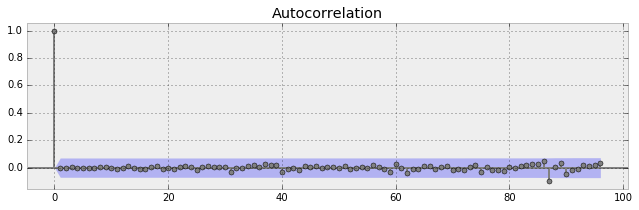

In [407]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
smg.tsa.plot_acf(ARfit.resid, lags = 96, color = 'grey', ax = ax)
fig.tight_layout()

#### (6) Êó∂Èó¥Â∫èÂàóÈ¢ÑÊµã
‰ªéÂõæ‰∏äÁúãÔºåÈ¢ÑÊµãÁöÑ 6 Êúà 1 Âè∑Âà∞ 5 Âè∑ÁöÑ pm2.5 Êï∞ÂÄºÔºåÁªìÊûúËæÉÁêÜÊÉ≥ÔºåÈ¢ÑÊµãÂæàË¥¥ËøëÁúüÂÆûÂÄº

/Users/Q16/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


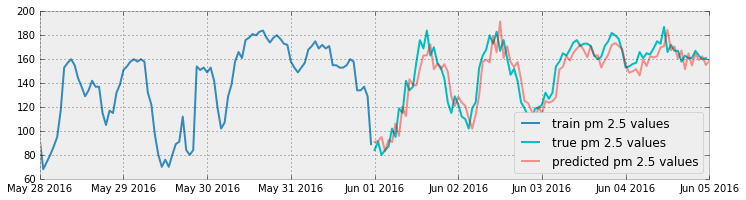

In [408]:
pm_train = pm[pm.index.month == 5]
pm_true = pm[pm.index.month == 6] 

plt.figure(figsize = (12, 3))
plt.plot(pm_train.index.values[-96:], pm_train.avg[-96:], label = 'train pm 2.5 values')
plt.plot(pm_true.index.values[:96], pm_true.values[:96], label = 'true pm 2.5 values', color = 'c')
plt.plot(pd.date_range("2016-06-01", "2016-06-05", freq="H").values,
        ARfit.predict("2016-06-01", "2016-06-05"), label="predicted pm 2.5 values", color = 'r', alpha = 0.4)

plt.legend(loc = 0)
plt.show()

---

### Á¨îËÆ∞

#### (1) Á∫øÊÄßÂõûÂΩíÊãüÂêàÁöÑÂá†ÁßçÊñπÂºè
1. np.linalg.lstsq(X, y)
    - ÂàõÂª∫ np arrays
    - ÊûÑÂª∫ np Áü©Èòµ np.vstack([]).T
    - np.linalg.lstsq(X, y)

2. statsmodel - sm.OLS(y, X) Ordinary Least Squares
    - ÊûÑÂª∫Ê®°Âûã model = sm.OLS(y, X)
    - ÊãüÂêà result = model.fit()
    - ÊòæÁ§∫ÂèÇÊï∞ result.params

3. dataframe Êé•ÂÖ• statsmodel 
    - ÊûÑÈÄ† dataframe
    - ÊûÑÂª∫ÂõûÂΩíÊ®°Âûã smf.ols('dependent variabl ~ constant variable + independent variable 1 + independent variable 2 + i1*i2', df)
    - ÊãüÂêà result = model.fit
    - ÊòæÁ§∫ÂèÇÊï∞ result.params
    - ```ÊâìÂç∞Êä•Âëä print(result.summary())```

#### (2) Á∫øÊÄßÂõûÂΩí‰∏é K nearest neighbor ( KNN ) ÁöÑÊØîËæÉ
1. ÂØπËÆ≠ÁªÉÊï∞ÊçÆÁöÑÊÄÅÂ∫¶
    - Á∫øÊÄßÂõûÂΩíÔºö ËÆ≠ÁªÉ‰∏Ä‰∫õÊï∞ÊçÆÔºåËÆ≠ÁªÉÂêéÂæóÂà∞‰∏ÄÁªÑÂèÇÊï∞ÔºåËÆ≠ÁªÉÂêéÁöÑÊï∞ÊçÆ‰πüÂ∞±‰∏çË¶Å‰∫Ü
    - KNNÔºö ÂéÜÂè≤Êï∞ÊçÆÈÉΩ‰ºöÁïô‰∏ãÊù•ÔºåÈ¢ÑÊµãÊó∂Ôºå‰ºöÂèÇËÄÉÂéÜÂè≤Êï∞ÊçÆ
2. ËøáÊãüÂêàÈóÆÈ¢ò‰∏äÁöÑ‰∏çÂêå
    - KNN ÁöÑ k Ë∂äÂ∞èÔºåË∂äÊúâÂèØËÉΩËøáÊãüÂêàÔºõÁ∫øÊÄßÂõûÂΩíÁöÑ degree Ëá™ÂèòÈáèË∂äÂ§öÔºåË∂äÊúâÂèØËÉΩËøáÊãüÂêà
3. ÊâÄÂç†Á©∫Èó¥ÔºåËÆ°ÁÆóÊó∂Èó¥‰∏éÊ∑ªÂä†Êñ∞Êï∞ÊçÆ‰∏äÁöÑ‰∏çÂêå
    - space for saving model Á∫øÊÄßÂõûÂΩíÂè™‰øùÂ≠òÊãüÂêàÂêéÁöÑÂèÇÊï∞ÔºåËÄå KNN Ë¶ÅÁïô‰∏ãÂ§ßÈáèÁöÑÂéÜÂè≤Êï∞ÊçÆ
    - time to train the data KNN ‰∏çÂ§™ÈúÄË¶ÅÊó∂Èó¥ÂéªËÆ≠ÁªÉÊï∞ÊçÆÔºåËÄåÁ∫øÊÄßÂõûÂΩíÁõ∏ÂØπÈúÄË¶ÅÊõ¥Â§öÊó∂Èó¥Êù•ËÆ≠ÁªÉÊï∞ÊçÆ
    - time to query KNN ÈúÄË¶ÅÊó∂Èó¥ÂéªÊéíÂ∫èÊï∞ÊçÆÔºåËÄåÁ∫øÊÄßÂõûÂΩíÊääÊï∞ÊçÆ‰ª£ÂÖ•ÁÆÄÂçïÁöÑÊñπÁ®ãÂç≥ÂèØ
    - adding new data Á∫øÊÄßÂõûÂΩíÈúÄË¶ÅÈáçÊñ∞ËÆ°ÁÆóÊñ∞Êï∞ÊçÆÔºåËÄå KNN ÂèØÊääÊï∞ÊçÆÁõ¥Êé•‰ª£ÂÖ•Â∑≤ÊúâÊï∞ÊçÆÈõÜ

#### (3)  ‰ΩøÁî® ```patsy.dmatrices()[1].design_info.term_names Âø´ÈÄüÂ§ÑÁêÜ‰∫§‰∫íÈ°π ```

y ~ -1 + a + b | y ~ a\*b\*c - a:b:c |  y ~ - 1 + C(a)  | y ~ I(a + b) | ```z = lambda y1, y2 : y1*y2``` \ y ~ z(a, b)  | y ~ - 1 + C(a, Poly)  
----|:------:|:----:|:----:|:------:|:----:|:------:|----|----|------|----
 ÂéªÈô§Êà™Ë∑ùÈ°π | a, b, c, a:b, b:c, a:c, <s>a:b:c<s>   | ËΩ¨‰∏∫ÂàÜÁ±ªÂèòÈáè a :0,1,0  | ['Intercept', 'I(a + b)'] | y ~ z(a, b)  | ËΩ¨‰∏∫È´òÊ¨°ÂáΩÊï∞ 
 

#### (4) Â¶Ç‰ΩïËß£ËØª regression output
#### 1. R-squared ÂÜ≥ÂÆöÁ≥ªÊï∞    
R^2 Ë∂äÈ´òÔºåÊ®°ÂûãÊãüÂêàÂæóË∂äÂ•Ω
#### 2. Intercept Êà™Ë∑ùÈ°π 
Êà™Ë∑ùÈ°π‰∏çÂÖ∑Â§áÂ§™Â§öÁöÑËß£ËØª‰ª∑ÂÄºÔºå‰ΩÜÂ¶ÇÊûúÂú®ÂõûÂΩíÊ®°Âûã‰∏≠ÂéªÈô§Â∫îÊúâÁöÑÊà™Ë∑ùÈ°πÔºåÂõûÂΩíÊ®°ÂûãÂèØËÉΩ‰ºö‰∫ßÁîüÂÅèÂ∑Æ„ÄÇ‰∏ÄÊó¶ÂéªÈô§Êà™Ë∑ùÈ°πÔºåÊ®°ÂûãÂ∞±‰∏çÂæó‰∏çÁªèËøáÂéüÁÇπÔºåÂÖ∂ÊñúÁéá‰πüÂ∞±‰ºöÂèóÂà∞ÂΩ±Âìç„ÄÇ‰∏ãÂõæ‰∏≠ÁªøÁ∫ø‰∏∫ÂéªÈô§Êà™Ë∑ùÈ°π‰πãÂêéÁöÑÁ∫øÊÄßÊ®°ÂûãÔºö

<img src="http://cdn2.content.compendiumblog.com/uploads/user/458939f4-fe08-4dbc-b271-efca0f5a2682/742d7708-efd3-492c-abff-6044d78e3bbd/Image/ea4e1643bedca51bf7281108b69efdd8/flp_no_constant.gif" width="40%" height="100%" style="float:left"/>

#### 3. Ê†áÂáÜËØØ P>[t]   
Âú®R output‰∏≠ÔºåËã•‰∏Ä‰∏™ÂèòÈáèÂØπÂ∫îÂæàÂ∞èÁöÑ p ÂÄºÔºåÂàôÊÑèÂë≥ÁùÄÂèØ‰ª•‰øùÁïôÊüêÂèòÈáè
#### 4. Ê£ÄÊµãÊÆãÂ∑Æ   
- z, p = stats.normaltest(result.resid.values)    
Â¶ÇÊûúÊÆãÂ∑Æ p ÂÄºËæÉÂ∞èÔºåËØ¥Êòé‰∏ÄÈÉ®ÂàÜËØ•ËÄÉËôëÂà∞ÁöÑÊï∞ÊçÆ‰∏çÂú® x1 Âíå x2 ‰∏≠ÔºåËÄåÊòØÁïôÂú®ÊÆãÂ∑Æ‰∏≠‰∫ÜÔºåÂõ†Ê≠§ÔºåÊ®°ÂûãÈúÄË¶ÅÁªèËøáËøõ‰∏ÄÊ≠•Ë∞ÉÊï¥„ÄÇ
- Q-Q plot   
Ëã•ÊÆãÂ∑ÆÊï∞ÊçÆÊéíÊàê 45 Â∫¶ÊñúÁ∫øÔºåÁ¨¶ÂêàÊ≠£ÊÄÅÂàÜÂ∏É

#### 5. Áõ∏ÂÖ≥Á≥ªÊï∞
result.params ËØ¥ÊòéÂêÑÂèòÈáèÂú®Ê®°Âûã‰∏≠ÊâÄÂç†ÁöÑÊùÉÈáç

#### (5) ÈÄªËæëÂõûÂΩí‰∏éÂÜ≥Á≠ñÊ†ëÁõ∏ÊØîÔºåÊúâ‰ªÄ‰πà‰ºòÂäø ÔºàÊëòÂèñËá™ üëá[quora](https://www.quora.com/What-are-the-advantages-of-logistic-regression-over-decision-trees) Ôºâ

**1. ÂÜ≥Á≠ñÊ†ëÁöÑÂÅáËÆæ**
- ÂÜ≥Á≠ñÊ†ëÂÅáËÆæÊàë‰ª¨ÁöÑÂÜ≥Á≠ñËæπÁïåÊòØ‰∏éÂùêÊ†áËΩ¥Âπ≥Ë°åÁöÑ     
ÊØîÂ¶ÇËØ¥ÔºåÂ¶ÇÊûúÊàë‰ª¨Êúâ‰∏§‰∏™ÁâπÂæÅ x1 Âíå x2ÔºåÈÇ£‰πàÂÜ≥Á≠ñÊ†ëÂè™ËÉΩ‰∫ßÁîüÂÉè x1 >= 4.5, x2 >= 6.5 ËøôÊ†∑ÁöÑËæπÁïåÔºåÂ¶ÇÂõæÊâÄÁ§∫Ôºö
<img src="https://qph.ec.quoracdn.net/main-qimg-3190f95e3bd446949131bb7339bd1da4" width="47%" height="100%" style="float:left"/>

- ÊâÄ‰ª•ÂÜ≥Á≠ñÊ†ë‰ºöÊääÁâπÂæÅÁ©∫Èó¥Âπ≥Êï¥Âú∞ÂàáÊàêÂè•ÂûãÔºåÊàñËÄÖÈ´òÁ∫¨Â∫¶ÁöÑË∂ÖÁü©ÂΩ¢„ÄÇÂàáÁü©ÂΩ¢ÁöÑÊñπÊ≥ïÂèØ‰ª•ÊúâÂæàÂ§öÁßçÔºåÂõ†Ê≠§ÂÜ≥Á≠ñÊ†ëÂæàËá™ÁÑ∂Âú∞‰ºöÂàõÂª∫Êõ¥Â§çÊùÇÁöÑÂáΩÊï∞ÔºåÊØîÂ¶ÇËØ¥ÊúâÊõ¥È´òÁöÑVCÁª¥ÔºåËøôÊ†∑ÂèØËÉΩ‰ºöÈÄ†ÊàêËøáÊãüÂêà 

**2. ÈÄªËæëÂõûÂΩíÁöÑÂÅáËÆæ**
- ÈÄªËæëÂõûÂΩí‰ºöÂÅáËÆæ‰∏Ä‰∏™Êõ¥Âπ≥ÊªëÁÅµÊ¥ªÁöÑÁ∫øÊÄßÂÜ≥Á≠ñËæπÁïåÔºå‰πüÂ∞±Ëß£ÂÜ≥‰∫ÜÂÜ≥Á≠ñÊ†ëÂπ≥Ë°å‰∫éÂùêÊ†áËΩ¥ÁöÑÂÜ≥Á≠ñËæπÁïåÈóÆÈ¢ò

<img src="https://qph.ec.quoracdn.net/main-qimg-c9d0a05dbf19fb8b1717b6f583aa57c7" width="47%" height="100%" style="float:left"/>



**3. ÂÜ≥Á≠ñÊ†ë‰∏éÈÄªËæëÂõûÂΩíÁöÑÊØîËæÉ**
- **Â∫îÁî®**ÔºöËøô‰∏§‰∏™ÁÆóÊ≥ïÁöÑÈÄüÂ∫¶ÈÉΩÂæàÂø´ÔºåÂ¶ÇÊûúË¶ÅËß£ÂÜ≥Âçï‰∏™ÂÜ≥Á≠ñËæπÁïåÈóÆÈ¢òÔºåÈÄªËæëÂõûÂΩíÂèØ‰ª•ÂæàÂ•ΩÂú∞ÂÆåÊàê‰ªªÂä°Ôºå‰∏îËÉΩÂ§üÂá∫Âπ≥ÊªëÁöÑÂÜ≥Á≠ñËæπÁïå„ÄÇËÄåÂÜ≥Á≠ñÊ†ë‰πüÊúâÂÆÉÁöÑ‰ºòÂäøÔºåÂÆÉËÉΩÂ§üÂú®Ëß£ÂÜ≥Â§ö‰∏™ÂÜ≥Á≠ñËæπÁïåÈóÆÈ¢òÊó∂ÂèëÊå•ÊúÄ‰Ω≥ÂäüÊïàÔºåËÉΩÂ§üË¢´Â∫îÁî®Âà∞Ë∂ÖÁü©ÂΩ¢Âå∫ÂüüÂΩì‰∏≠
- **ËøáÊãüÂêà**ÔºöÈÄªËæëÂõûÂΩíÁõ∏ÂØπÁÆÄÂçïÔºåÂèòÂåñËæÉÂ∞ëÔºåËæÉ‰∏çÂÆπÊòì‰∫ßÁîüËøáÊãüÂêàÈóÆÈ¢ò„ÄÇËÄåÂÜ≥Á≠ñÊ†ëËÉΩË¢´ÂàíÂàÜ‰∏∫Â§çÊùÇÁöÑÂáΩÊï∞Ôºå‰πüÂ∞±ÂÆπÊòì‰∫ßÁîüËøáÊãüÂêàÈóÆÈ¢ò„ÄÇÂèØ‰ª•Áî®Ââ™ÊûùÁÆóÊ≥ïÊù•Ëß£ÂÜ≥Ëøô‰∏ÄÈóÆÈ¢ò
- **ÁªìÂêà**ÔºöÊÄéÊ†∑ËÉΩËÆ©ÂÜ≥Á≠ñÊ†ë‰øùÁïôÂàíÂàÜÂ§öÁª¥ÂÜ≥Á≠ñËæπÁïåÁöÑËÉΩÂäõÔºåÂèà‰∏çÂÅöÂá∫Âπ≥Ë°å‰∫éÂùêÊ†áËΩ¥ÁöÑÂÜ≥Á≠ñËæπÁïåÂë¢ ‚Äì‚Äì ÊîØÊåÅÂêëÈáèÊú∫